In [275]:
import kagglehub

# download the dataset
path = kagglehub.dataset_download("adilshamim8/math-students")
csv_path = path + "/Math-Students.csv"
print("Path to dataset files:", path)


Path to dataset files: /home/ness/.cache/kagglehub/datasets/adilshamim8/math-students/versions/1


In [276]:
import pandas as pd

df = pd.read_csv(csv_path)
print(f"Columns: {df.columns}") 
df.head()


Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [277]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,16.709273,2.761905,2.536341,1.443609,2.035088,0.330827,3.954887,3.233083,3.097744,1.476190,2.288221,3.558897,5.651629,10.879699,10.676692,10.380952
std,1.278225,1.096340,1.092716,0.695429,0.835020,0.740655,0.898335,0.994107,1.113178,0.887552,1.281737,1.384013,7.983113,3.315195,3.760845,4.571073
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.500000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [278]:
# removing the columns we are not interested about
df = df[[#'school', 
    'sex',
    #'age', 
    'address', 
    #'famsize', 
    'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 
    #'reason', 
    'guardian', 
    #'traveltime', 
    'studytime',
    #'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 
    #'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
    #'G1', 'G2', 
    'G3']].copy()

In [279]:
# normalizing the column names
df = df.rename(columns={
    'Pstatus':'pstatus', 
    'Medu': 'medu',
    'Fedu':'fedu',
    'Mjob':'mjob',
    'Fjob': 'fjob'
})

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        399 non-null    object
 1   address    399 non-null    object
 2   pstatus    399 non-null    object
 3   medu       399 non-null    int64 
 4   fedu       399 non-null    int64 
 5   mjob       399 non-null    object
 6   fjob       399 non-null    object
 7   guardian   399 non-null    object
 8   studytime  399 non-null    int64 
 9   internet   399 non-null    object
 10  G3         399 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 34.4+ KB


In [281]:
# checking if there's any missing values
df.isnull().sum()

sex          0
address      0
pstatus      0
medu         0
fedu         0
mjob         0
fjob         0
guardian     0
studytime    0
internet     0
G3           0
dtype: int64

In [282]:
# looking for duplicated rows
df.loc[df.duplicated()]

,sex,address,pstatus,medu,fedu,mjob,fjob,guardian,studytime,internet,G3
103,F,U,T,3,2,services,other,mother,2,yes,6
226,F,U,T,3,2,other,other,mother,2,yes,15
261,M,U,T,4,3,teacher,other,mother,2,yes,8
284,F,U,T,2,2,other,other,mother,2,yes,11
302,F,U,T,4,2,other,other,mother,3,yes,14
396,M,U,T,4,4,teacher,services,mother,2,no,7


In [283]:
# removing duplicated rows
df = df[~df.duplicated()].copy()
df.reset_index(drop=True)

,sex,address,pstatus,medu,fedu,mjob,fjob,guardian,studytime,internet,G3
0,F,U,A,4,4,at_home,teacher,mother,2,no,6
1,F,U,T,1,1,at_home,other,father,2,yes,6
2,F,U,T,1,1,at_home,other,mother,2,yes,10
3,F,U,T,4,2,health,services,mother,3,yes,15
4,F,U,T,3,3,other,other,father,2,no,10
...,...,...,...,...,...,...,...,...,...,...,...
388,M,R,T,3,2,services,other,mother,1,yes,10
389,M,U,T,1,1,other,at_home,father,1,yes,9
390,M,U,T,4,4,teacher,services,mother,2,no,7
391,M,U,T,4,4,teacher,other,mother,2,no,7


In [284]:
df["outcome"] = df["G3"] >= 10
df["outcome"] = df["outcome"]
print(df["outcome"].value_counts())

outcome
True     262
False    131
Name: count, dtype: int64


<Axes: xlabel="Mother's Job", ylabel='Count'>

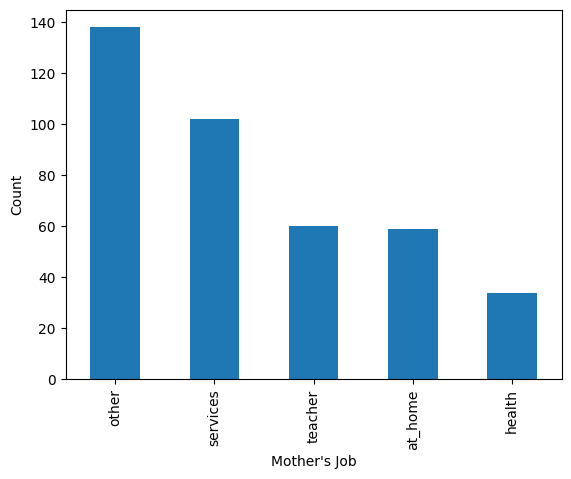

In [285]:
import matplotlib.pyplot as plt
df["mjob"].value_counts().plot(kind="bar", xlabel="Mother's Job", ylabel="Count")

<Axes: xlabel="Father's Job", ylabel='Count'>

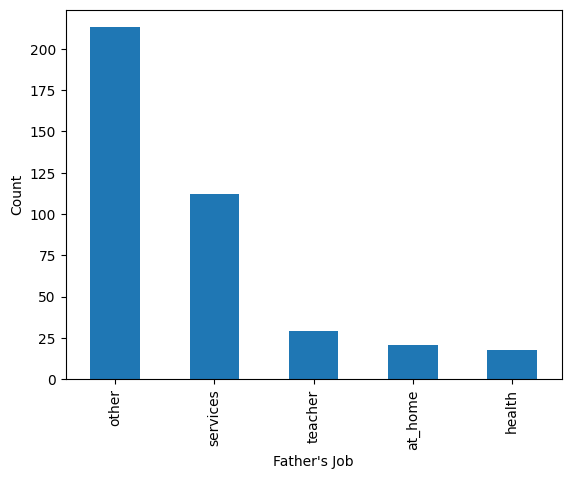

In [286]:
df["fjob"].value_counts().plot(kind="bar", xlabel="Father's Job", ylabel="Count")

pstatus
T    352
A     41
Name: count, dtype: int64


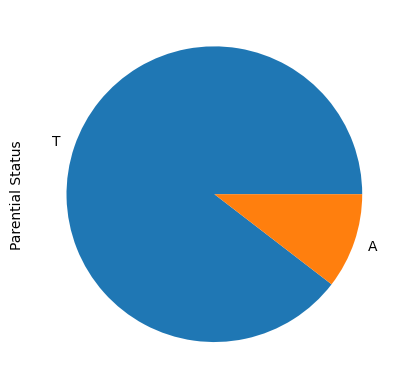

In [287]:
df["pstatus"].value_counts().plot(kind="pie", ylabel="Parential Status")
print(df["pstatus"].value_counts())

guardian
mother    271
father     90
other      32
Name: count, dtype: int64


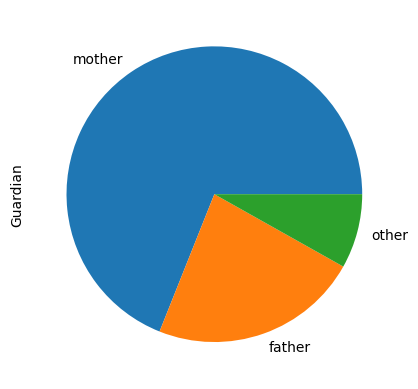

In [288]:
df["guardian"].value_counts().plot(kind="pie", ylabel="Guardian")
print(df["guardian"].value_counts())

<Axes: xlabel='Count', ylabel='Sex'>

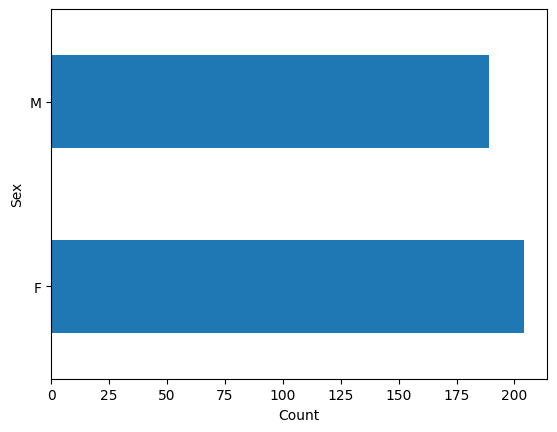

In [289]:
df["sex"].value_counts().plot(kind="barh",xlabel="Count", ylabel="Sex")

<Axes: xlabel='Count', ylabel='Area'>

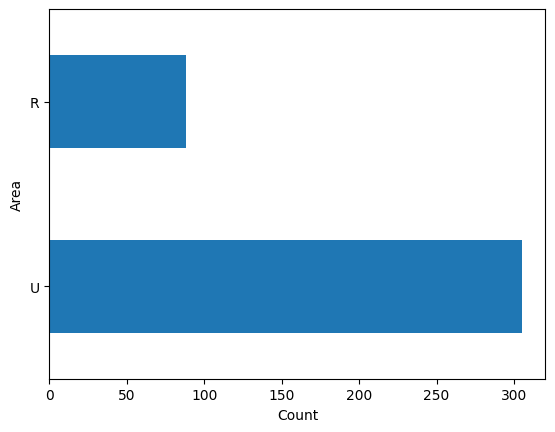

In [290]:
df["address"].value_counts().plot(kind="barh",xlabel="Count", ylabel="Area")

<Axes: ylabel='Internet Access'>

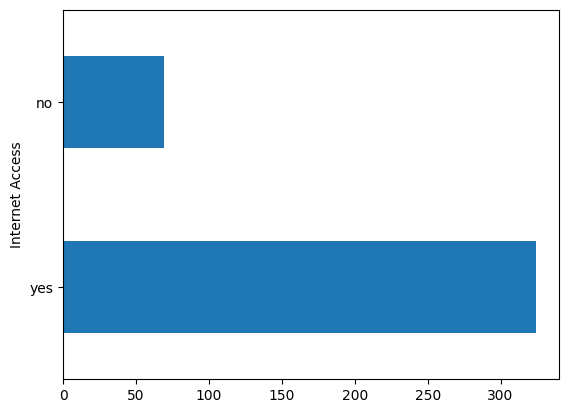

In [291]:
df["internet"].value_counts().plot(kind="barh",ylabel="Internet Access", xlabel="")

<Axes: ylabel='Density'>

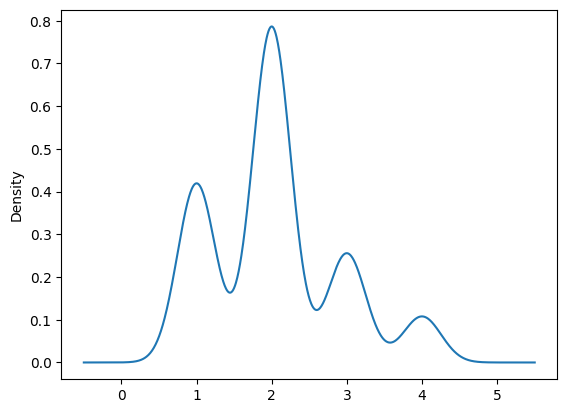

In [292]:
import scipy
df["studytime"].plot(kind="kde")

<Axes: xlabel='medu'>

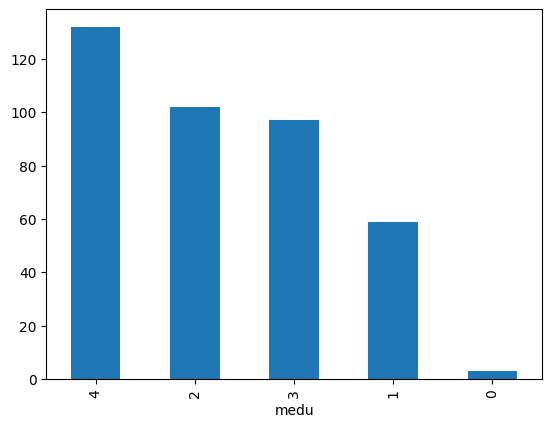

In [293]:
df["medu"].value_counts().plot(kind="bar")

<Axes: xlabel='fedu'>

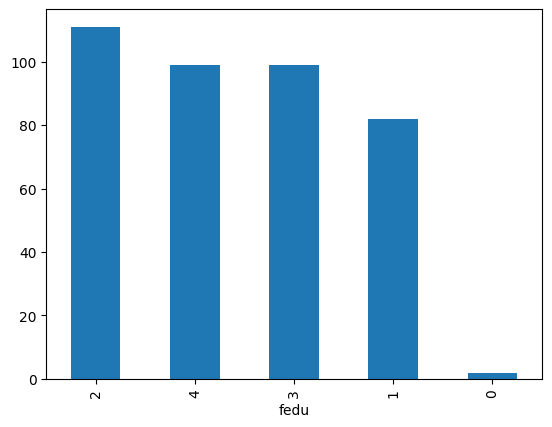

In [294]:
df["fedu"].value_counts().plot(kind="bar")

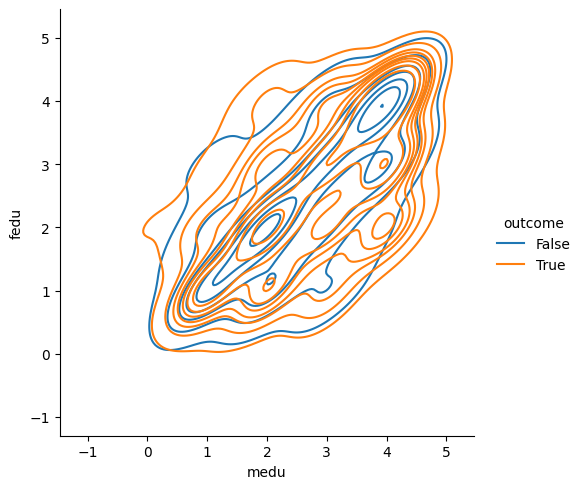

In [295]:
import seaborn as sns
sns.displot(data=df, x="medu", y="fedu", hue="outcome", kind="kde")

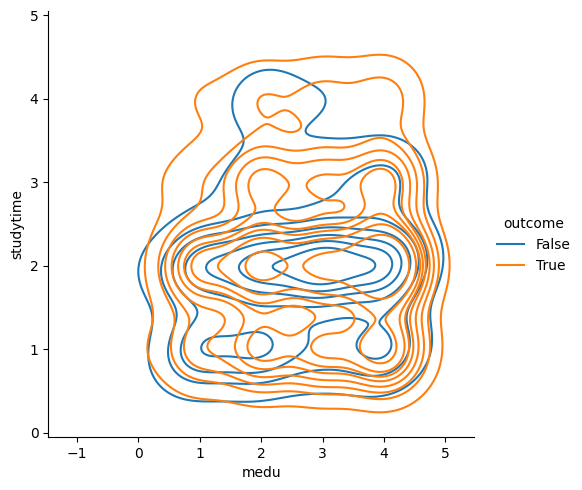

In [296]:
sns.displot(data=df, x="medu", y="studytime", hue="outcome", kind="kde")

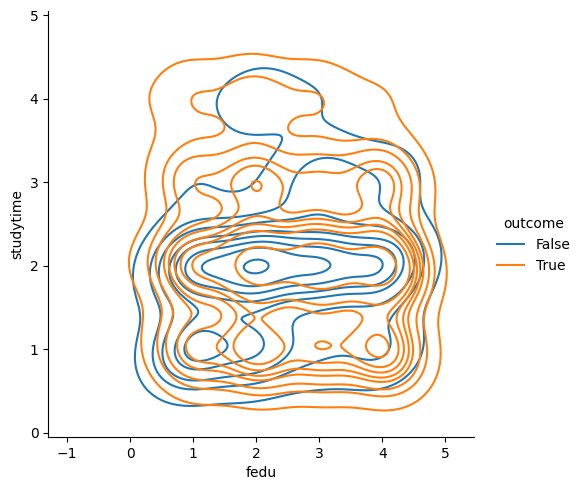

In [297]:
sns.displot(data=df, x="fedu", y="studytime", hue="outcome", kind="kde")

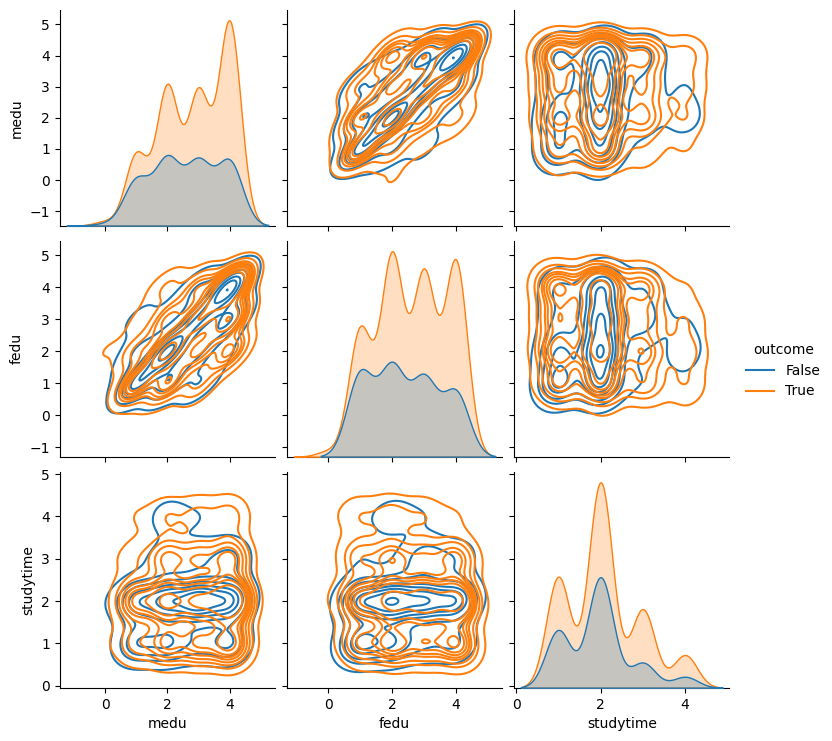

In [298]:
sns.pairplot(data=df, vars=["medu", "fedu", "studytime"], hue="outcome", kind="kde")

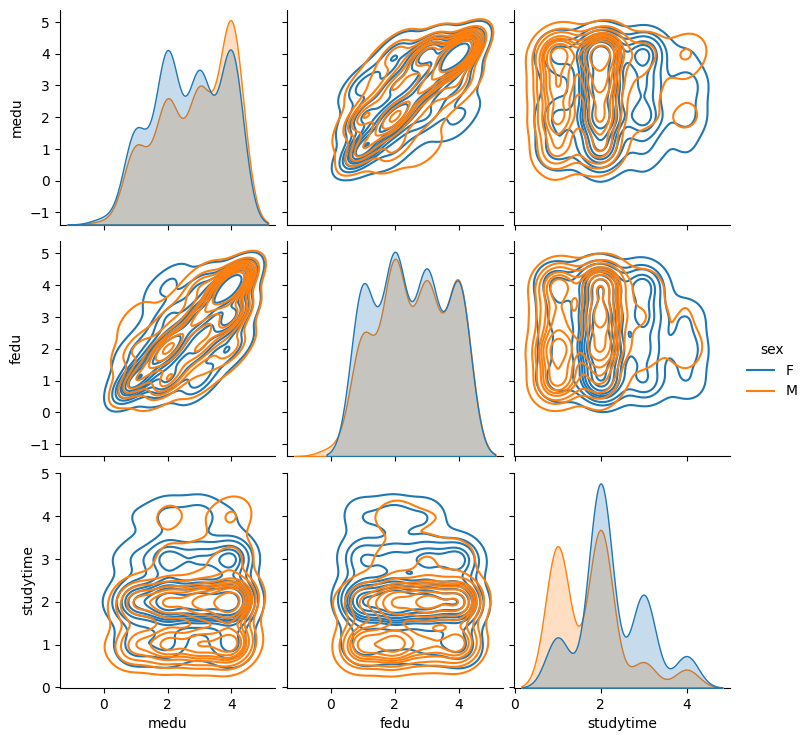

In [299]:
sns.pairplot(data=df, vars=["medu", "fedu", "studytime"], hue="sex", kind="kde")

<Axes: >

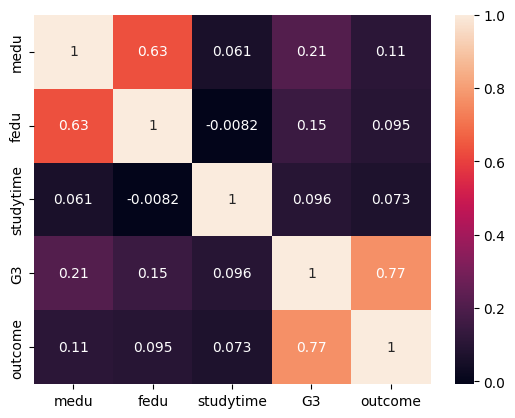

In [300]:
df_corr = df[["medu", "fedu", "studytime", "G3", "outcome"]].corr()
sns.heatmap(data=df_corr, annot=True)

In [301]:
df = pd.get_dummies(df, columns=["address", "pstatus", "sex", "internet", "mjob", "fjob", "guardian"])

In [302]:
df

,medu,fedu,studytime,G3,outcome,address_R,address_U,pstatus_A,pstatus_T,sex_F,...,mjob_services,mjob_teacher,fjob_at_home,fjob_health,fjob_other,fjob_services,fjob_teacher,guardian_father,guardian_mother,guardian_other
0,4,4,2,6,False,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
1,1,1,2,6,False,False,True,False,True,True,...,False,False,False,False,True,False,False,True,False,False
2,1,1,2,10,True,False,True,False,True,True,...,False,False,False,False,True,False,False,False,True,False
3,4,2,3,15,True,False,True,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,3,3,2,10,True,False,True,False,True,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3,2,1,10,True,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
394,1,1,1,9,False,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
395,4,4,2,7,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
397,4,4,2,7,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False


<Axes: >

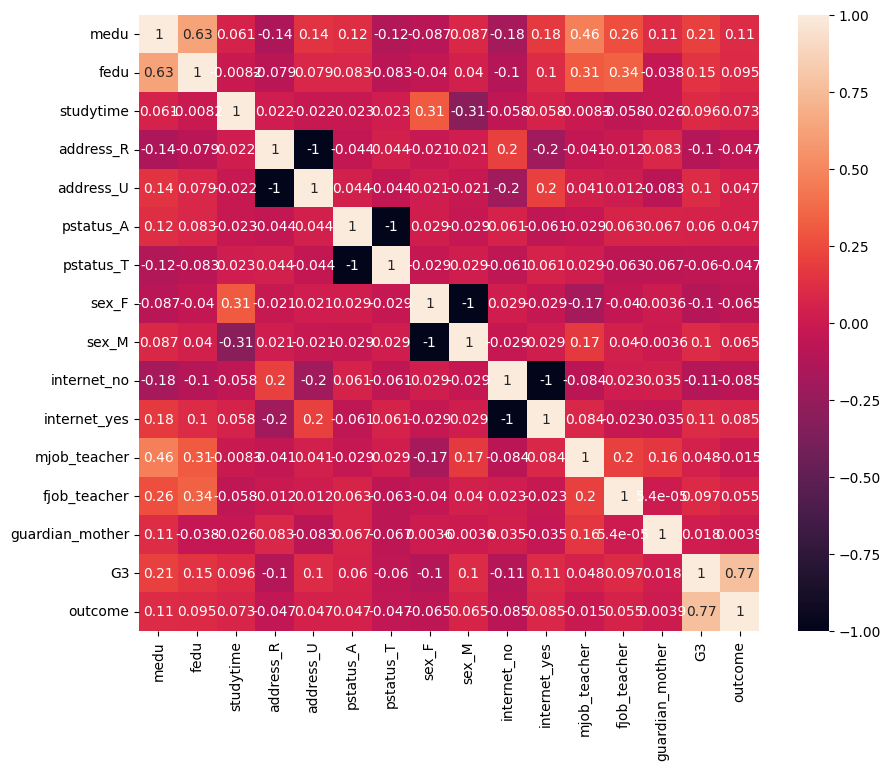

In [303]:
df_corr = df[["medu", "fedu", "studytime", "address_R", "address_U", "pstatus_A", "pstatus_T", "sex_F", "sex_M", "internet_no", "internet_yes", "mjob_teacher", "fjob_teacher", "guardian_mother", "G3", "outcome"]].corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_corr, annot=True, ax=ax)

In [304]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [305]:
columns = list(df.columns)
columns.remove("outcome")
columns.remove("G3")

In [306]:
from sklearn.datasets import load_iris


data = load_iris()
X = SelectKBest(k=10).fit_transform(df[columns], df["outcome"])
y = df["outcome"]

In [307]:
#x_columns = ["medu", "fedu", "studytime", "address_R", "address_U", "pstatus_A", "pstatus_T", "sex_F", "sex_M", "internet_no", "internet_yes"]
#X = df[x_columns]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [308]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [309]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5932203389830508
